<a href="https://colab.research.google.com/github/hasanocal7/DS-Libs/blob/main/Matplotlib_BarPlot_%26_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sahte Veri Oluşturma

In [2]:
np.arange(2010,2021)

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [5]:
data = {
    "Yıl": np.arange(2010,2021),
    "Satış": np.random.randint(100,500,11),
    "Masraf": np.random.randint(50,400,11)
}

df = pd.DataFrame(data)

regions = ["Kuzey","Güney","Doğu","Batı"]

df["Bölge"] = np.random.choice(regions,df.shape[0])

df

,Yıl,Satış,Masraf,Bölge
0,2010,264,62,Kuzey
1,2011,437,381,Batı
2,2012,376,318,Batı
3,2013,242,227,Kuzey
4,2014,190,286,Kuzey
5,2015,286,144,Güney
6,2016,492,220,Batı
7,2017,207,243,Kuzey
8,2018,350,164,Doğu
9,2019,379,394,Güney


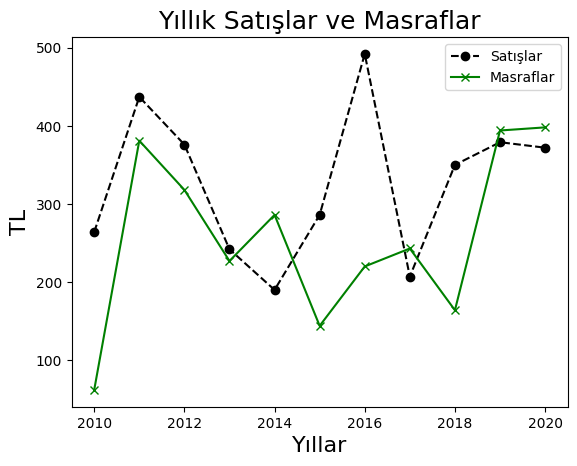

In [19]:
plt.plot(df["Yıl"], df["Satış"], 
         color="black", 
         label = "Satışlar", 
         linestyle = "--", 
         marker = "o", 
         markerfacecolor="black")

# Soru: Yıl ve Masrafı aynı plota ekleyin (marker = x)

plt.plot(df["Yıl"], df["Masraf"], 
         color="green", 
         label = "Masraflar", 
         linestyle = "-", 
         marker = "x", 
         markerfacecolor="green")

plt.title("Yıllık Satışlar ve Masraflar", fontsize = 18)
plt.xlabel("Yıllar", fontsize = 16)
plt.ylabel("TL", fontsize = 16)
plt.legend()
plt.show()

# plt.bar()



*   `plt.bar()`, bir sütun grafiği çizer.
*   Farklı kategorilerin değerleri arasındaki ilişkileri gösterir.

<BarContainer object of 5 artists>

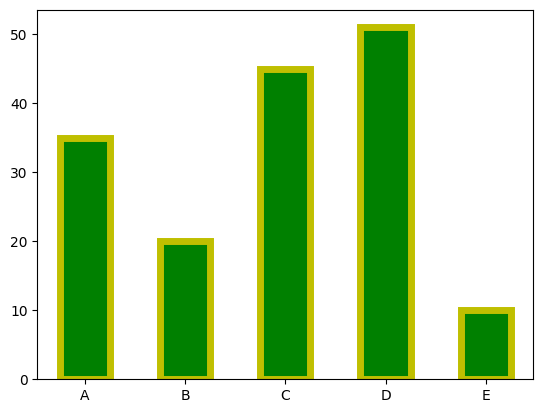

In [28]:
categories = ["A", "B", "C", "D", "E"]
values = [35, 20, 45, 51, 10]

plt.bar(categories, values,
        color = "green",
        width = 0.5,
        edgecolor= "y",
        linewidth = 5)

### Soru: Aşağıda verilen veri kümesindeki şehir ve nüfus değerlerini kullanarak bir barplot çizelim.

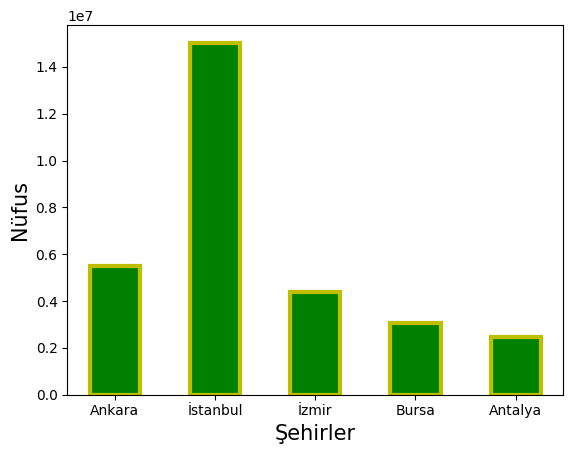

In [35]:
data = { 'Şehir': ['Ankara', 'İstanbul', 'İzmir', 'Bursa', 'Antalya'], 
         'Nüfus': [5503985, 15029231, 4367251, 3056120, 2444535] }

plt.bar(data["Şehir"], data["Nüfus"],
        color = "green",
        width = 0.5,
        edgecolor= "y",
        linewidth = 3)

#  Scientific Notation

plt.xlabel("Şehirler", fontsize = 15)
plt.ylabel("Nüfus", fontsize = 15)

plt.show()

In [38]:
sales_by_region = df.groupby("Bölge")["Satış"].sum()
sales_by_region

Bölge
Batı     1305
Doğu      350
Güney    1037
Kuzey     903
Name: Satış, dtype: int64

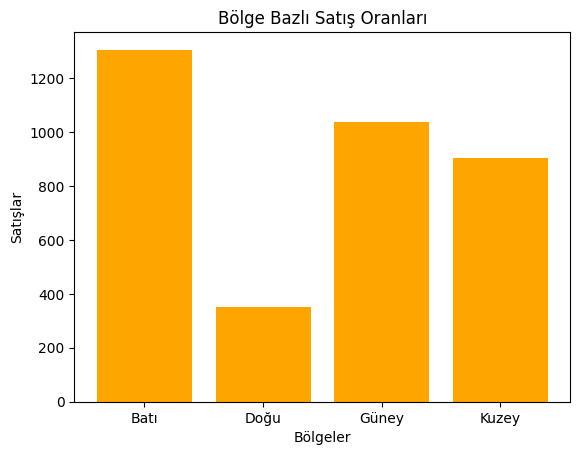

In [44]:
plt.bar(sales_by_region.index, sales_by_region.values,color="Orange")

plt.xlabel("Bölgeler")
plt.ylabel("Satışlar")
plt.title("Bölge Bazlı Satış Oranları")

plt.show()

In [45]:
df

,Yıl,Satış,Masraf,Bölge
0,2010,264,62,Kuzey
1,2011,437,381,Batı
2,2012,376,318,Batı
3,2013,242,227,Kuzey
4,2014,190,286,Kuzey
5,2015,286,144,Güney
6,2016,492,220,Batı
7,2017,207,243,Kuzey
8,2018,350,164,Doğu
9,2019,379,394,Güney


# Histogram Mantığı

In [55]:
# İki fonksiyon var
# pd.cut(): bin arası mesafe eşit
# bin : nümerik datanın grubu olarak düşünülebilir.
# pd.qcut(): bin arası mesafe eşit değil
sales_bins = pd.cut(df["Satış"], bins=10)
sales_bins.value_counts()

(371.2, 401.4]      3
(189.698, 220.2]    2
(220.2, 250.4]      1
(250.4, 280.6]      1
(280.6, 310.8]      1
(341.0, 371.2]      1
(431.6, 461.8]      1
(461.8, 492.0]      1
(310.8, 341.0]      0
(401.4, 431.6]      0
Name: Satış, dtype: int64

In [56]:
sales_qs = pd.qcut(df["Satış"], q=10)
sales_qs.value_counts()

(189.999, 207.0]    2
(207.0, 242.0]      1
(242.0, 264.0]      1
(264.0, 286.0]      1
(286.0, 350.0]      1
(350.0, 372.0]      1
(372.0, 376.0]      1
(376.0, 379.0]      1
(379.0, 437.0]      1
(437.0, 492.0]      1
Name: Satış, dtype: int64

In [68]:
bin_counts = sales_bins.value_counts().sort_index()

In [69]:
bin_counts.index

CategoricalIndex([(189.698, 220.2],   (220.2, 250.4],   (250.4, 280.6],
                    (280.6, 310.8],   (310.8, 341.0],   (341.0, 371.2],
                    (371.2, 401.4],   (401.4, 431.6],   (431.6, 461.8],
                    (461.8, 492.0]],
                 categories=[(189.698, 220.2], (220.2, 250.4], (250.4, 280.6], (280.6, 310.8], (310.8, 341.0], (341.0, 371.2], (371.2, 401.4], (401.4, 431.6], ...], ordered=True, dtype='category')

In [70]:
bin_means = [(interval.left + interval.right) / 2 for interval in bin_counts.index]

<BarContainer object of 10 artists>

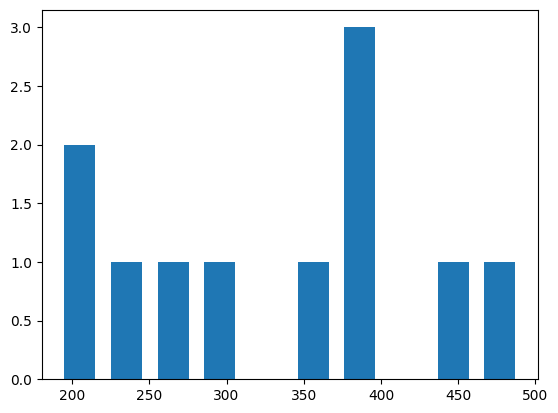

In [72]:
plt.bar(bin_means, bin_counts.values,
        width = 20)

# plt.hist()
Nümerik değerlerinizin dapğılımı sağlaya bir grafiktir, histogram çier.

### Parametreler

- bin: grup dağılımını belirler.
- range: binlerin alt ve üst limitini belirler.
- density: True olursa grfik yoğunluk belirler, false frekans belirler.


(array([2., 1., 1., 1., 0., 1., 3., 0., 1., 1.]),
 array([190. , 220.2, 250.4, 280.6, 310.8, 341. , 371.2, 401.4, 431.6,
        461.8, 492. ]),
 <BarContainer object of 10 artists>)

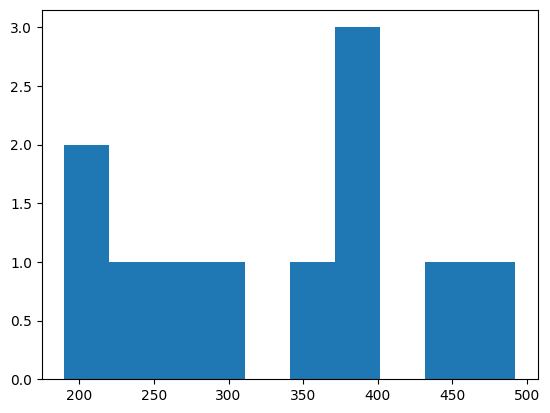

In [74]:
plt.hist(df["Satış"], bins = 10)

## Soru: plt.hist() kullanrak NumPy ile random veri oluşturup plt.hist ile frekansı görselleştirin.
- np.random.randn faydalanabilirsiniz.
- bins = 30 olsun
- renk vb. farketmez.

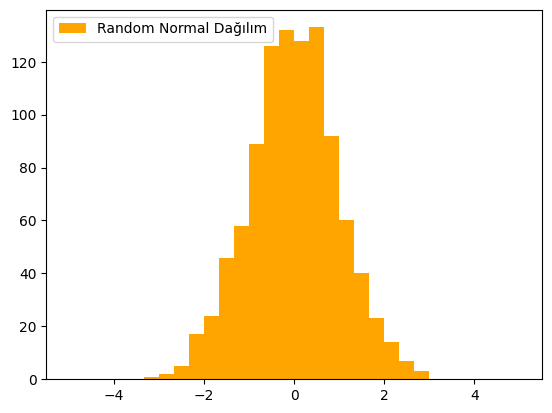

In [80]:
plt.hist(np.random.randn(1000), bins = 30, color = "Orange", label = "Random Normal Dağılım", range = (-5,5))
plt.legend()
plt.show()

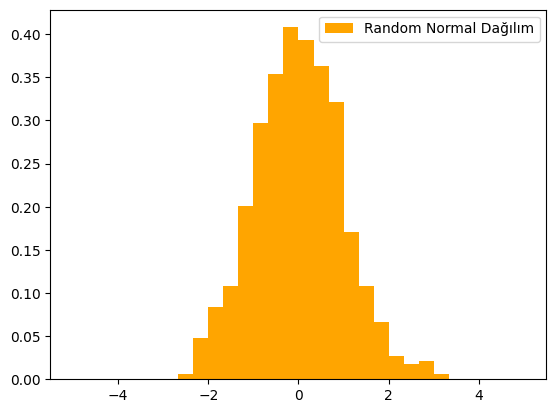

In [81]:
plt.hist(np.random.randn(1000), bins = 30, color = "Orange", label = "Random Normal Dağılım", range = (-5,5), density = True)
plt.legend()
plt.show()